In [65]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [104]:
covid_cases = pd.read_csv("covid-cases.csv")
covid_cases["Date"] = covid_cases["Date"].apply(pd.to_datetime)
covid_cases.head()

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
0,0,2020-04-01,AN,0,0,0,Andaman and Nicobar Islands
1,1,2020-04-01,AP,67,0,1,Andhra Pradesh
2,2,2020-04-01,AR,0,0,0,Arunachal Pradesh
3,3,2020-04-01,AS,15,0,0,Assam
4,4,2020-04-01,BR,3,0,0,Bihar


In [145]:
covid_plot = covid_cases.melt(id_vars=['Unnamed: 0', 'Date', 'State', 'State_Name'], value_vars=['Confirmed', 'Deceased','Recovered'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

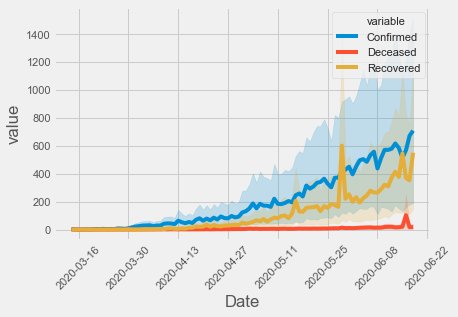

In [148]:
plt.style.use('fivethirtyeight')

g = sns.lineplot(x="Date", y="value", hue="variable", data=covid_plot)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

plt.setp(g.get_xticklabels(), rotation=45)

## Literacy

In [17]:
literacy = pd.read_csv("literacy.csv")
literacy.head()

,State,Literacy_Total,Literacy_Rural,Literacy_Urban,Literacy_Rate_Total,Literacy_Rate_Rural,Literacy_Rate_Urban,Male_Literacy_Rate_Total,Male_Literacy_Rate_Rural,Male_Literacy_Rate_Urban,Female_Literacy_Rate_Total,Female_Literacy_Rate_Rural,Female_Literacy_Rate Urban
0,India,"77,84,54,120","49,30,20,878","28,54,33,242",74.04,68.91,84.98,82.14,78.57,89.67,65.46,58.75,79.92
1,Jammu and Kashmir,"72,45,053","48,98,008","23,47,045",68.74,64.97,78.19,78.26,75.51,84.90,58.01,53.36,70.19
2,Himachal Pradesh,"51,04,506","45,33,373","5,71,133",83.78,82.91,91.39,90.83,90.48,93.72,76.60,75.33,88.66
3,Punjab,"1,89,88,611","1,11,95,395","77,93,216",76.68,72.45,83.70,81.48,77.92,87.28,71.34,66.47,79.62
4,Chandigarh,"8,09,653","20,217","7,89,436",86.43,81.69,86.56,90.54,86.68,90.65,81.38,74.17,81.55


In [25]:
set(covid_cases.State_Name.tolist()) - set(literacy.State.tolist())

{'Ladakh', 'State Unassigned', 'Telangana', 'Total'}

In [28]:
covid_cases = covid_cases[~covid_cases.State_Name.isin(['Ladakh', 'State Unassigned', 'Telangana', 'Total'])]

In [35]:
covid_cases = covid_cases.sort_values(by=['State_Name', 'Date'])

In [40]:
covid_df = covid_cases.set_index('State_Name', append=True).swaplevel(0,1)

In [44]:
df = covid_df.merge(literacy, 'left', left_on='State_Name', right_on="State")

In [47]:
df.head()

,Unnamed: 0,Date,State_x,Confirmed,Deceased,Recovered,State_y,Literacy_Total,Literacy_Rural,Literacy_Urban,Literacy_Rate_Total,Literacy_Rate_Rural,Literacy_Rate_Urban,Male_Literacy_Rate_Total,Male_Literacy_Rate_Rural,Male_Literacy_Rate_Urban,Female_Literacy_Rate_Total,Female_Literacy_Rate_Rural,Female_Literacy_Rate Urban
0,1599,2020-03-14,AN,0,0,0,Andaman and Nicobar Islands,"2,93,695","1,83,863","1,09,832",86.27,84.39,89.6,90.11,88.53,92.96,81.84,79.58,85.79
1,1755,2020-03-15,AN,0,0,0,Andaman and Nicobar Islands,"2,93,695","1,83,863","1,09,832",86.27,84.39,89.6,90.11,88.53,92.96,81.84,79.58,85.79
2,1911,2020-03-16,AN,0,0,0,Andaman and Nicobar Islands,"2,93,695","1,83,863","1,09,832",86.27,84.39,89.6,90.11,88.53,92.96,81.84,79.58,85.79
3,2067,2020-03-17,AN,0,0,0,Andaman and Nicobar Islands,"2,93,695","1,83,863","1,09,832",86.27,84.39,89.6,90.11,88.53,92.96,81.84,79.58,85.79
4,2223,2020-03-18,AN,0,0,0,Andaman and Nicobar Islands,"2,93,695","1,83,863","1,09,832",86.27,84.39,89.6,90.11,88.53,92.96,81.84,79.58,85.79


In [49]:
df.to_csv("merge.csv")

In [50]:
df.sort_values("Date")

,Unnamed: 0,Date,State_x,Confirmed,Deceased,Recovered,State_y,Literacy_Total,Literacy_Rural,Literacy_Urban,Literacy_Rate_Total,Literacy_Rate_Rural,Literacy_Rate_Urban,Male_Literacy_Rate_Total,Male_Literacy_Rate_Rural,Male_Literacy_Rate_Urban,Female_Literacy_Rate_Total,Female_Literacy_Rate_Rural,Female_Literacy_Rate Urban
0,1599,2020-03-14,AN,0,0,0,Andaman and Nicobar Islands,"2,93,695","1,83,863","1,09,832",86.27,84.39,89.60,90.11,88.53,92.96,81.84,79.58,85.79
873,1607,2020-03-14,DL,7,1,1,Delhi,"1,27,63,352","3,00,539","1,24,62,813",86.34,82.67,86.43,91.03,90.04,91.05,80.93,74.03,81.10
2231,1623,2020-03-14,MZ,0,0,0,Mizoram,"8,47,592","3,68,672","4,78,920",91.58,84.31,98.10,93.72,88.35,98.67,89.40,80.04,97.54
194,1601,2020-03-14,AR,0,0,0,Arunachal Pradesh,"7,89,943","5,57,105","2,32,838",66.95,61.59,84.57,73.69,68.79,89.45,59.57,53.78,79.04
1164,1612,2020-03-14,HR,14,0,0,Haryana,"1,69,04,324","1,03,93,591","65,10,733",76.64,72.74,83.83,85.38,83.20,89.37,66.77,60.97,77.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2209,2020-06-18,NL,0,0,6,Nagaland,"13,57,579","9,04,799","4,52,780",80.11,75.86,90.21,83.29,79.49,92.11,76.69,72.01,88.10
1357,2196,2020-06-18,HP,10,0,5,Himachal Pradesh,"51,04,506","45,33,373","5,71,133",83.78,82.91,91.39,90.83,90.48,93.72,76.60,75.33,88.66
872,2191,2020-06-18,DD,0,0,0,Daman and Diu,"1,88,974","43,281","1,45,693",87.07,81.51,88.87,91.48,89.71,91.95,79.59,71.97,82.94
2909,2214,2020-06-18,SK,0,0,1,Sikkim,"4,49,294","3,26,398","1,22,896",82.20,79.82,89.26,87.29,85.42,92.94,76.43,73.42,85.19


In [98]:
#Finding Correlation on day-to-day CoVID cases

lit_metric = 'Literacy_Rate_Total'
cov_metric = 'Recovered'

corr_vals = []
for i in df["Date"].unique():
    corr_df = df[df["Date"] == i]
    corr_vals.append([i, corr_df[cov_metric].corr(corr_df[lit_metric], method='spearman')])
    
new_df = pd.DataFrame(corr_vals, columns=["Date", lit_metric + " | " + cov_metric])
new_df.head()

,Date,Literacy_Rate_Total | Recovered
0,2020-03-14,-0.001014
1,2020-03-15,-0.081449
2,2020-03-16,0.067924
3,2020-03-17,-0.186790
4,2020-03-18,NaN


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

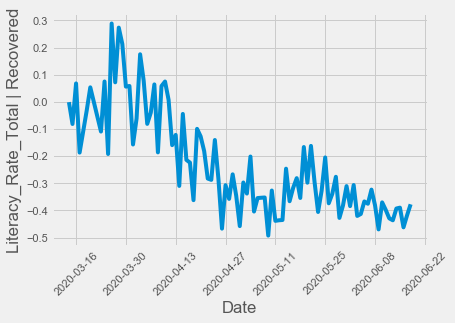

In [99]:
plt.style.use('fivethirtyeight')

g = sns.lineplot(x="Date", y=lit_metric + " | " + cov_metric, data=new_df)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

plt.setp(g.get_xticklabels(), rotation=45)

## Media Exposure

Note: Does not have Union Territories data

Data: https://en.wikipedia.org/wiki/Indian_states_ranking_by_media_exposure

In [100]:
media = pd.read_csv("media.csv")
media.head()

,Male_Rank,Female_Rank,State,Male,Female
0,1,1,Kerala,99,97
1,4,3,Punjab,94,95
2,3,3,Tamil Nadu,95,95
3,1,2,Goa,99,96
4,2,5,Andhra Pradesh,96,93


In [106]:
set(covid_cases.State_Name.tolist()) - set(media.State.tolist())
# set(media.State.tolist()) - set(covid_cases.State_Name.tolist())

{'Andaman and Nicobar Islands',
 'Chandigarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman and Diu',
 'Delhi',
 'Haryana',
 'Ladakh',
 'Lakshadweep',
 'Puducherry',
 'State Unassigned',
 'Total'}

In [107]:
covid_cases = covid_cases.sort_values(by=['State_Name', 'Date'])

In [108]:
covid_df = covid_cases.set_index('State_Name', append=True).swaplevel(0,1)

In [113]:
df = covid_df.merge(media, 'outer', left_on='State_Name', right_on="State")

In [114]:
df.sort_values("Date")
df.head()

,Unnamed: 0,Date,State_x,Confirmed,Deceased,Recovered,Male_Rank,Female_Rank,State_y,Male,Female
0,1599.0,2020-03-14,AN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1755.0,2020-03-15,AN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1911.0,2020-03-16,AN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2067.0,2020-03-17,AN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2223.0,2020-03-18,AN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [138]:
#Finding Correlation on day-to-day CoVID cases

cov_metric = 'Recovered'

corr_vals = []
for i in df["Date"].unique():
    corr_df = df[df["Date"] == i]
    corr_vals.append([i, 'Male', corr_df[cov_metric].corr(corr_df['Male'], method='spearman')])
    corr_vals.append([i, 'Female', corr_df[cov_metric].corr(corr_df['Female'], method='spearman')])
    
new_df = pd.DataFrame(corr_vals, columns=["Date", 'Gender', "Media Exposure | " + cov_metric])
new_df.head()

,Date,Gender,Media Exposure | Recovered
0,2020-03-14,Male,-0.096492
1,2020-03-14,Female,-0.095837
2,2020-03-15,Male,0.023328
3,2020-03-15,Female,-0.051795
4,2020-03-16,Male,0.167093


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

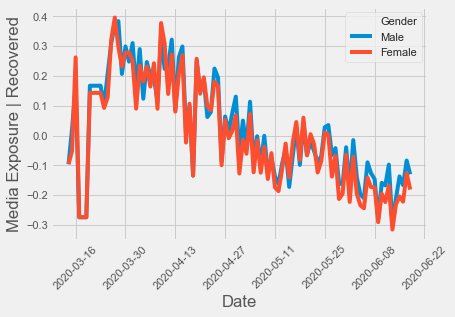

In [139]:
plt.style.use('fivethirtyeight')

g = sns.lineplot(x="Date", y="Media Exposure | " + cov_metric, hue='Gender', data=new_df)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

plt.setp(g.get_xticklabels(), rotation=45)

## GDP

In [154]:
gdp = pd.read_csv("gdp.csv")
gdp.head()

,State,GDP
0,Maharashtra,32.24
1,Tamil Nadu,20.91
2,Gujarat,18.85
3,Karnataka,18.05
4,Uttar Pradesh,17.91


In [156]:
set(covid_cases.State_Name.tolist()) - set(gdp.State.tolist())
# set(gdp.State.tolist()) - set(covid_cases.State_Name.tolist())

{'Dadra and Nagar Haveli and Daman and Diu',
 'Daman and Diu',
 'Ladakh',
 'Lakshadweep',
 'State Unassigned',
 'Total'}

In [157]:
covid_cases = covid_cases.sort_values(by=['State_Name', 'Date'])
covid_df = covid_cases.set_index('State_Name', append=True).swaplevel(0,1)
df = covid_df.merge(gdp, 'outer', left_on='State_Name', right_on="State")
df.sort_values("Date")
df

,Unnamed: 0,Date,State_x,Confirmed,Deceased,Recovered,State_y,GDP
0,1599,2020-03-14,AN,0,0,0,Andaman and Nicobar Islands,0.066
1,1755,2020-03-15,AN,0,0,0,Andaman and Nicobar Islands,0.066
2,1911,2020-03-16,AN,0,0,0,Andaman and Nicobar Islands,0.066
3,2067,2020-03-17,AN,0,0,0,Andaman and Nicobar Islands,0.066
4,2223,2020-03-18,AN,0,0,0,Andaman and Nicobar Islands,0.066
...,...,...,...,...,...,...,...,...
3778,1598,2020-06-14,WB,389,12,518,West Bengal,14.700
3779,1754,2020-06-15,WB,407,10,434,West Bengal,14.700
3780,1910,2020-06-16,WB,415,10,534,West Bengal,14.700
3781,2066,2020-06-17,WB,391,11,505,West Bengal,14.700


In [164]:
cov_metric = 'Recovered'

corr_vals = []
for i in df["Date"].unique():
    corr_df = df[df["Date"] == i]
    corr_vals.append([i, corr_df[cov_metric].corr(corr_df['GDP'], method='spearman')])
    
new_df = pd.DataFrame(corr_vals, columns=["Date", "GDP | " + cov_metric])
new_df.head()

,Date,GDP | Recovered
0,2020-03-14,0.315427
1,2020-03-15,0.256703
2,2020-03-16,0.278479
3,2020-03-17,0.222783
4,2020-03-18,NaN


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

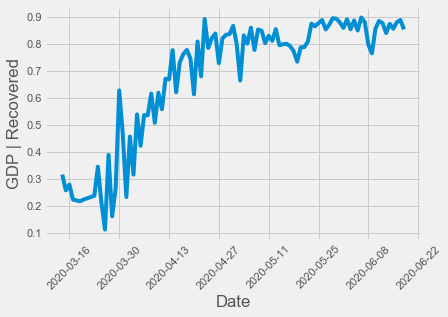

In [165]:
plt.style.use('fivethirtyeight')

g = sns.lineplot(x="Date", y="GDP | " + cov_metric, data=new_df)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

plt.setp(g.get_xticklabels(), rotation=45)

## HDI

In [166]:
hdi = pd.read_csv("hdi.csv")
hdi.head()

,State,HDI
0,Kerala,0.779
1,Chandigarh,0.775
2,Goa,0.761
3,Lakshadweep,0.750
4,Delhi,0.746


In [169]:
# set(covid_cases.State_Name.tolist()) - set(hdi.State.tolist())
# set(hdi .State.tolist()) - set(covid_cases.State_Name.tolist())

{'Dadra and Nagar Haveli'}

In [170]:
covid_cases = covid_cases.sort_values(by=['State_Name', 'Date'])
covid_df = covid_cases.set_index('State_Name', append=True).swaplevel(0,1)
df = covid_df.merge(hdi, 'outer', left_on='State_Name', right_on="State")
df.sort_values("Date")
df

,Unnamed: 0,Date,State_x,Confirmed,Deceased,Recovered,State_y,HDI
0,1599.0,2020-03-14,AN,0.0,0.0,0.0,Andaman and Nicobar Islands,0.739
1,1755.0,2020-03-15,AN,0.0,0.0,0.0,Andaman and Nicobar Islands,0.739
2,1911.0,2020-03-16,AN,0.0,0.0,0.0,Andaman and Nicobar Islands,0.739
3,2067.0,2020-03-17,AN,0.0,0.0,0.0,Andaman and Nicobar Islands,0.739
4,2223.0,2020-03-18,AN,0.0,0.0,0.0,Andaman and Nicobar Islands,0.739
...,...,...,...,...,...,...,...,...
3779,1754.0,2020-06-15,WB,407.0,10.0,434.0,West Bengal,0.641
3780,1910.0,2020-06-16,WB,415.0,10.0,534.0,West Bengal,0.641
3781,2066.0,2020-06-17,WB,391.0,11.0,505.0,West Bengal,0.641
3782,2222.0,2020-06-18,WB,435.0,12.0,468.0,West Bengal,0.641


In [175]:
cov_metric = 'Recovered'

corr_vals = []
for i in df["Date"].unique():
    corr_df = df[df["Date"] == i]
    corr_vals.append([i, corr_df[cov_metric].corr(corr_df['HDI'], method='spearman')])
    
new_df = pd.DataFrame(corr_vals, columns=["Date", "HDI | " + cov_metric])
new_df.head()

,Date,HDI | Recovered
0,2020-03-14,0.026124
1,2020-03-15,-0.018470
2,2020-03-16,0.101928
3,2020-03-17,-0.271808
4,2020-03-18,NaN


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

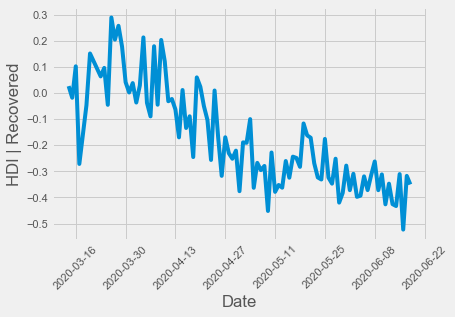

In [176]:
plt.style.use('fivethirtyeight')

g = sns.lineplot(x="Date", y="HDI | " + cov_metric, data=new_df)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

plt.setp(g.get_xticklabels(), rotation=45)